39


/Users/matmang/opt/anaconda3/envs/bert-study/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/matmang/opt/anaconda3/envs/bert-study/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

/Users/matmang/opt/anaconda3/envs/bert-study/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/Users/matmang/opt/anaconda3/envs/bert-study/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


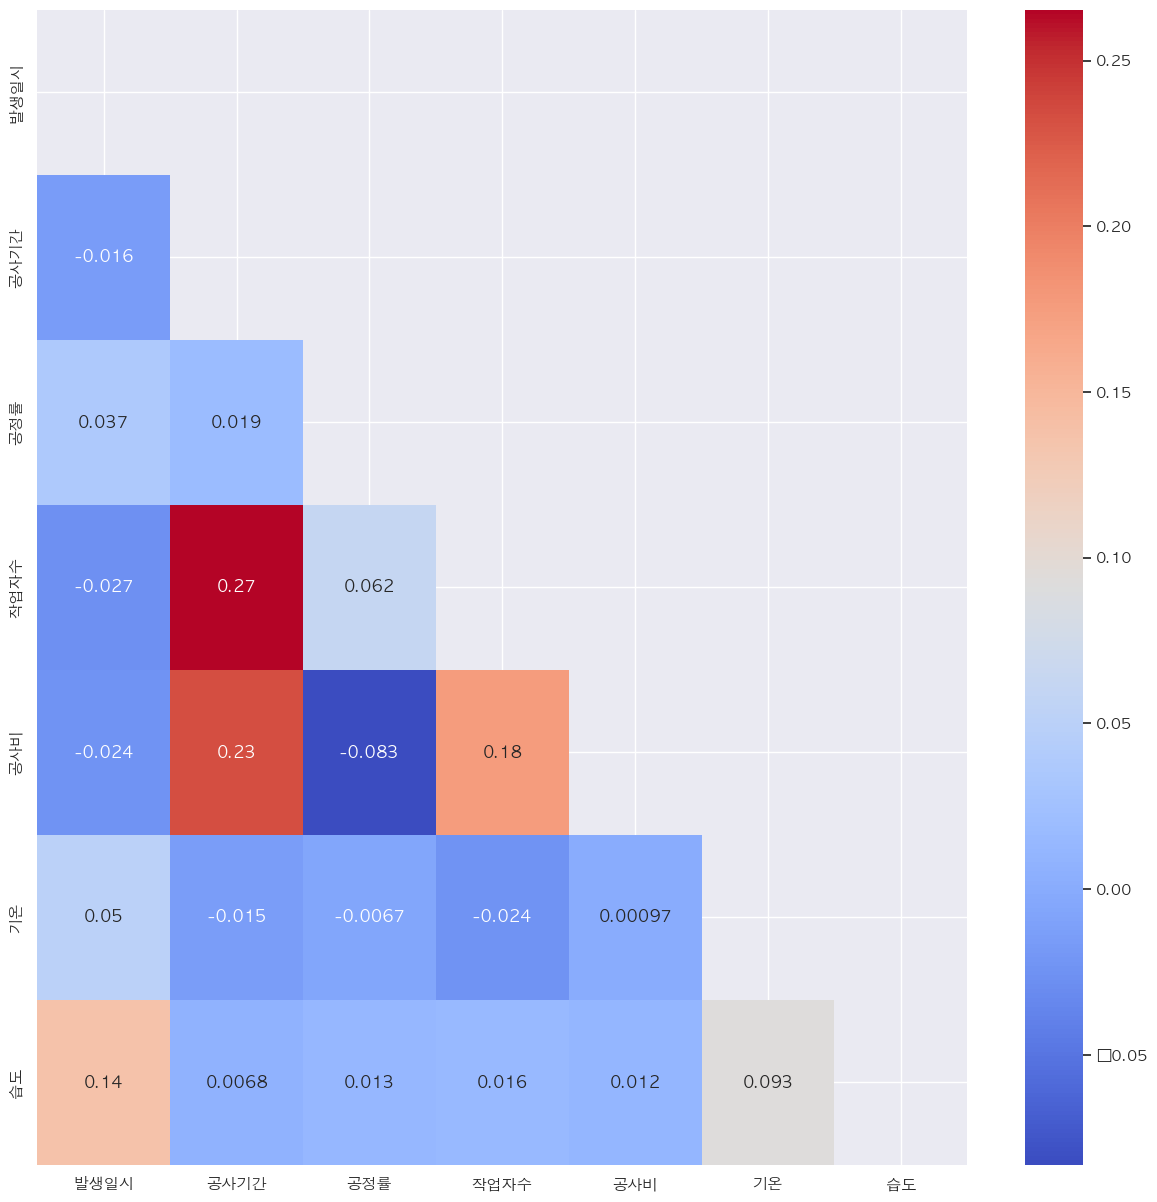

In [5]:
import sys
sys.path.append('..')

import pandas as pd
import seaborn as sns
from cleansing.data_cleansing import preprocess_data
import numpy as np
import matplotlib.pyplot as plt

# 데이터 전처리 함수 호출
X_train, _, y_train, _ = preprocess_data()


# 필요한 컬럼만 선택
columns = ['발생일시', '공사기간', '공정률', '작업자수', '공사비', '기온', '습도']
X_train = X_train[columns]

# correlation matrix 생성
corr_matrix = X_train.corr()

# heatmap 크기 설정
sns.set(rc={'figure.figsize':(15, 15)})

# 대각선 부분을 제외한 상삼각행렬만 출력
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.rcParams['font.family'] = 'AppleGothic'

# heatmap 시각화
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm')


39


/Users/matmang/opt/anaconda3/envs/bert-study/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/matmang/opt/anaconda3/envs/bert-study/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

/Users/matmang/opt/anaconda3/envs/bert-study/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/Users/matmang/opt/anaconda3/envs/bert-study/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


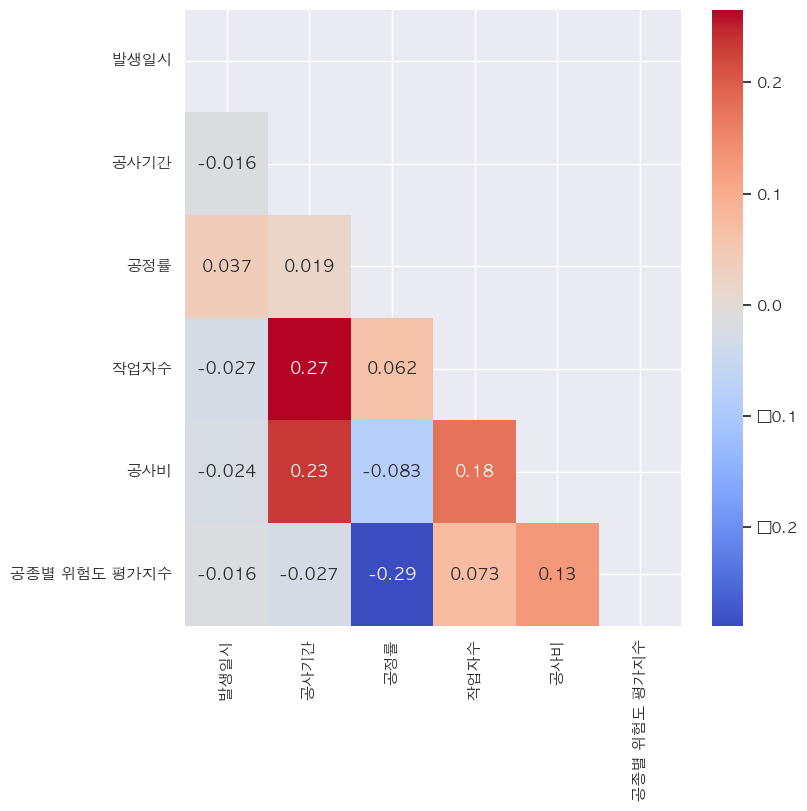

In [6]:
import sys
sys.path.append('..')

import pandas as pd
import seaborn as sns
from cleansing.data_cleansing import preprocess_data
import numpy as np
import matplotlib.pyplot as plt

# 데이터 전처리 함수 호출
X_train, _, y_train, _ = preprocess_data()


# 필요한 컬럼만 선택
columns = ['발생일시', '공사기간', '공정률', '작업자수', '공사비']
X_train = X_train[columns]

# X_train과 y_train을 합침
df_train = pd.concat([X_train, y_train], axis=1)

# correlation matrix 생성
corr_matrix = df_train.corr()

# heatmap 크기 설정
sns.set(rc={'figure.figsize':(8, 8)})

# 대각선 부분을 제외한 상삼각행렬만 출력
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.rcParams['font.family'] = 'AppleGothic'

# heatmap 시각화
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm')

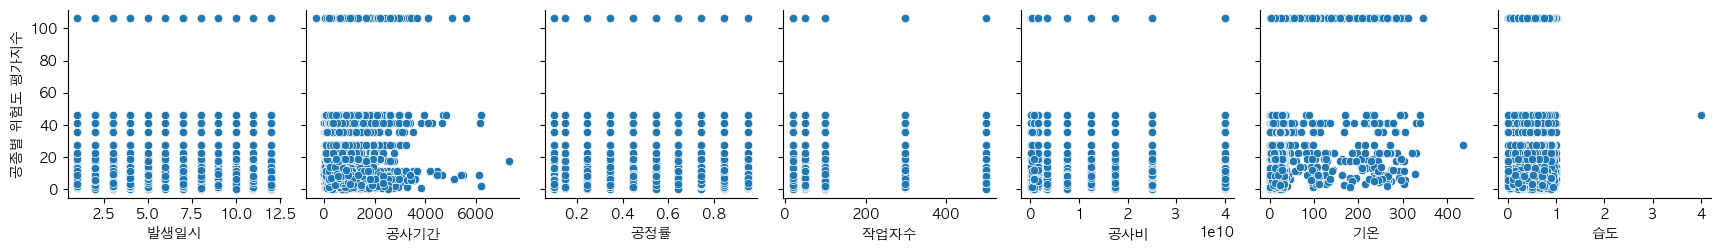

In [3]:
# X_train과 y_train을 합침
df_train = pd.concat([X_train, y_train], axis=1)

# pairplot 생성
sns.pairplot(df_train, x_vars=X_train.columns, y_vars=['공종별 위험도 평가지수'])



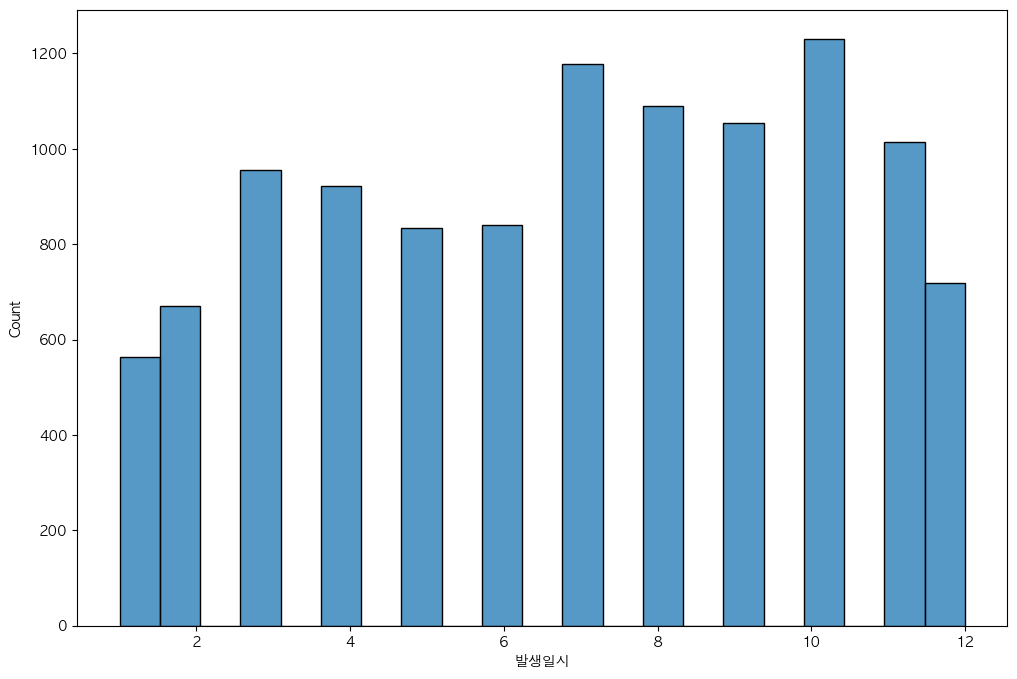

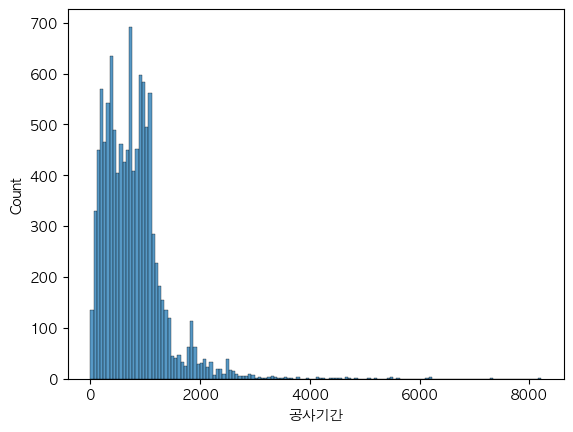

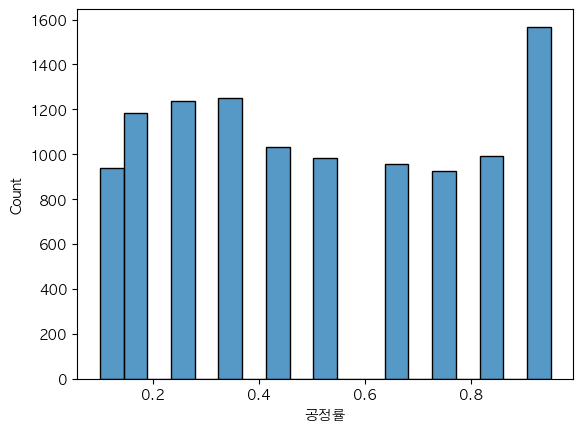

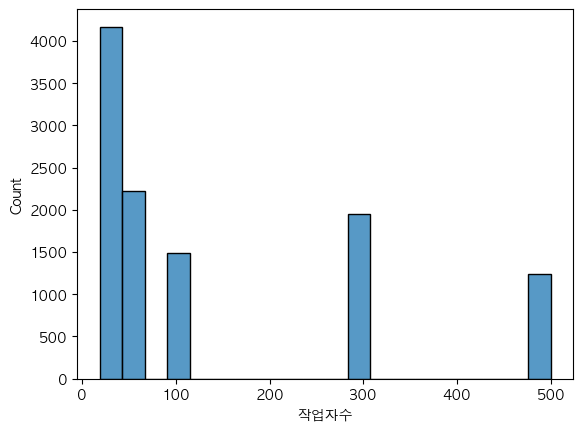

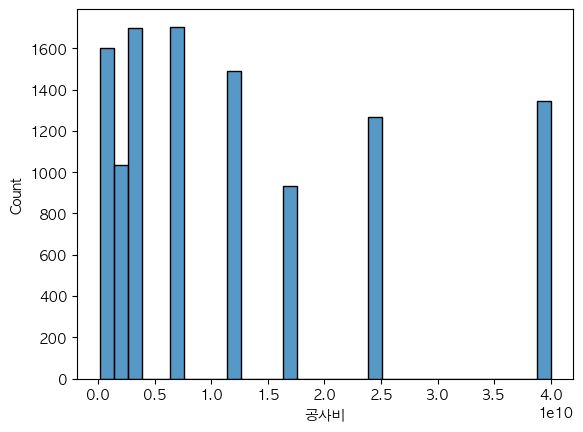

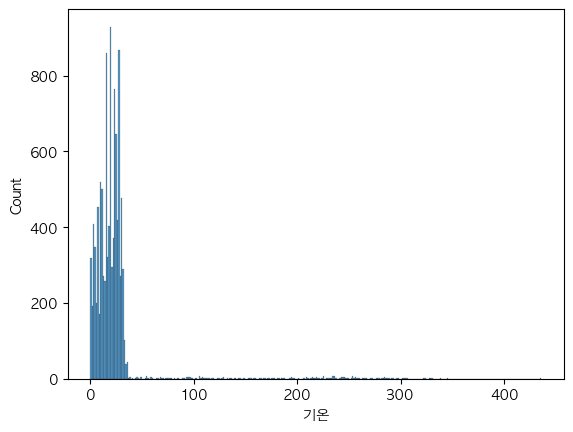

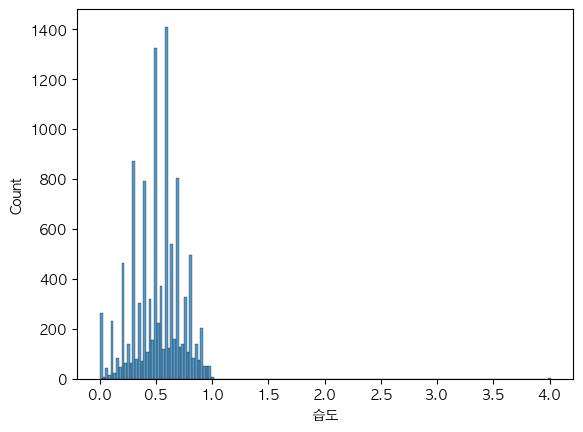

In [7]:
import matplotlib.pyplot as plt

# 그래프 크기 설정
plt.figure(figsize=(12, 8))

# 컬럼 리스트
columns = ['발생일시', '공사기간', '공정률', '작업자수', '공사비', '기온', '습도']

# 각 컬럼별로 그래프 그리기
for col in columns:
    sns.histplot(data=df_train, x=col)
    plt.show()


/Users/matmang/opt/anaconda3/envs/bert-study/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


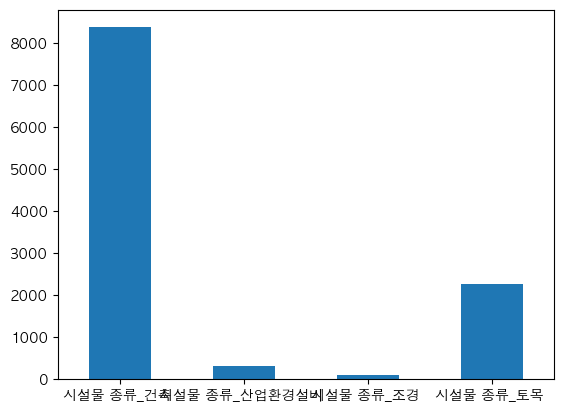

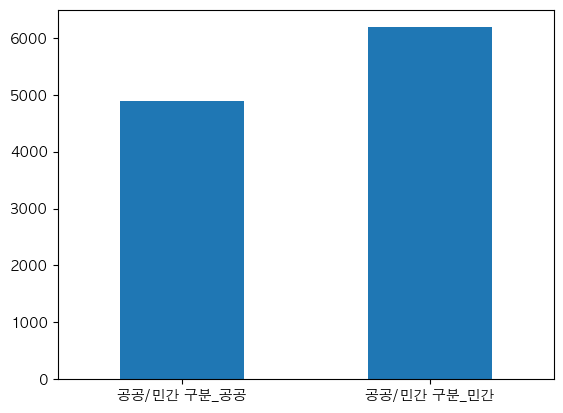

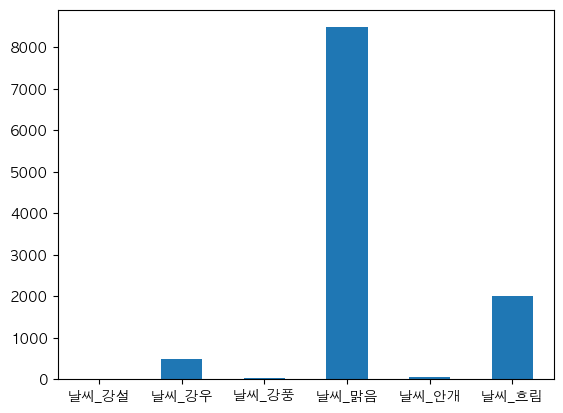

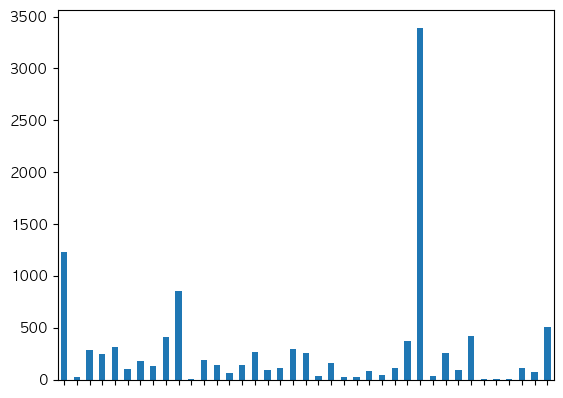

In [5]:
# 데이터 전처리 함수 호출
X_train, _, y_train, _ = preprocess_data()

# X_train과 y_train을 합침
df_train = pd.concat([X_train, y_train], axis=1)

# 시설물 종류별 데이터 분포 확인
facility_cols = ['시설물 종류_건축 ', '시설물 종류_산업환경설비 ', '시설물 종류_조경 ', '시설물 종류_토목 ']
facility_df = df_train[facility_cols]
# 공공/민간 구분별 1인 값 개수 계산
facility_counts = facility_df.sum()
facility_counts.plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

# # 공공/민간 구분별 데이터 분포 확인
public_cols = ['공공/민간 구분_공공', '공공/민간 구분_민간']
public_df = df_train[public_cols]
public_counts = public_df.sum()
public_counts.plot(kind="bar")
plt.xticks(rotation=0)
plt.show()

# # 날씨별 데이터 분포 확인
weather_cols = ['날씨_강설', '날씨_강우', '날씨_강풍', '날씨_맑음', '날씨_안개', '날씨_흐림']
weather_df = df_train[weather_cols]
weather_counts = weather_df.sum()
weather_counts.plot(kind="bar")
plt.xticks(rotation=0)
plt.show()

# # 공종별 데이터 분포 확인
construction_cols = ['공종_가설공사', '공종_강구조물공사', '공종_건축 토공사', '공종_건축물 부대공사', '공종_관공사',
                     '공종_관공사 부대공사', '공종_교량공사', '공종_금속공사', '공종_기계설비공사', '공종_기타', '공종_댐 및 제방공사',
                     '공종_도로 및 포장공사', '공종_도장공사', '공종_말뚝공사', '공종_목공사', '공종_미장공사', '공종_방수공사',
                     '공종_산업설비공사', '공종_수장공사', '공종_전기설비공사', '공종_조경공사', '공종_조적공사', '공종_지반개량공사',
                     '공종_지반조사', '공종_지붕 및 홈통공사', '공종_지정공사',  '공종_창호 및 유리공사', '공종_철골공사', '공종_철근콘크리트공사', '공종_철도 및 궤도공사', '공종_타일 및 돌공사',
       '공종_터널공사', '공종_토공사', '공종_통신설비공사', '공종_특수 건축물공사', '공종_프리캐스트 콘크리트공사',
       '공종_하천공사', '공종_항만공사', '공종_해체 및 철거공사']
construction_df = df_train[construction_cols]
construction_counts = construction_df.sum()
construction_counts.plot(kind="bar")
plt.xticks(rotation=0)
plt.gca().set(xticklabels=[])
plt.show()
